## Importing Dependencies
* Pandas
* MatPlotLib
* Seaborn
* Scipy
* Numpy
* Scikit-learn


In [359]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline

In [360]:
df = pd.read_csv("/Users/Work/Projects/GDSC/Input_Dataset.csv")
df_test = pd.read_csv("/Users/Work/Projects/GDSC/Test_Dataset.csv")
df_submit = pd.read_csv("/Users/Work/Projects/GDSC/sample_submission.csv")

## Exploratory Data Analysis

In [361]:
df.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,language,overview,popularity,production_companies,production_countries,...,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_day_of_the_week,release_date
0,0,1,"{'id': 313576, 'name': 'Hot Tub Time Machine C...",14000000.00,"[{'id': 35, 'name': 'Comedy'}]",en,"When Lou, who has become the ""father of the In...",2.233967,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'id': 52997, 'name': 'Rob Corddry', 'charate...","[{'id': 1449071, 'name': 'Kelly Cantley', 'dep...",12314651,2015,Friday,2015-02-20
1,1,2,"{'id': 107674, 'name': 'The Princess Diaries C...",40000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Mia Thermopolis is now a college graduate and ...,2.802533,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'id': 1813, 'name': 'Anne Hathaway', 'charat...","[{'id': 1201, 'name': 'Garry Marshall', 'depar...",95149435,2004,Friday,2004-08-06
2,2,3,NaN,3300000.00,"[{'id': 18, 'name': 'Drama'}]",en,"Under the direction of a ruthless instructor, ...",21.845701,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'id': 996701, 'name': 'Miles Teller', 'chara...","[{'id': 494, 'name': 'Terri Taylor', 'departme...",13092000,2014,Friday,2014-10-10
3,3,4,NaN,1200000.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,1.078673,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'id': 35068, 'name': 'Vidya Balan', 'charate...","[{'id': 95510, 'name': 'Sujoy Ghosh', 'departm...",16000000,2012,Friday,2012-03-09
4,4,5,NaN,22531334.11,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,Marine Boy is the story of a former national s...,0.390053,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,Released,NaN,Marine Boy,NaN,"[{'id': 84751, 'name': 'Kim Kang-woo', 'charat...","[{'id': 84749, 'name': 'Jong-seok Yoon', 'depa...",3923970,2009,Thursday,2009-02-05


In [362]:
df.shape

(2400, 22)

In [363]:
df.columns

Index(['Unnamed: 0', 'id', 'belongs_to_collection', 'budget', 'genres',
       'language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'release_year', 'release_day_of_the_week', 'release_date'],
      dtype='object')

In [364]:
df_test.shape

(600, 21)

In [365]:
df_test.columns

Index(['Unnamed: 0', 'id', 'belongs_to_collection', 'budget', 'genres',
       'language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'Keywords', 'cast', 'crew', 'release_year',
       'release_day_of_the_week', 'release_date'],
      dtype='object')

In [366]:
df_submit.shape

(480, 23)

In [367]:
df_submit.columns

Index(['Unnamed: 0', 'id', 'belongs_to_collection', 'budget', 'genres',
       'language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'release_year', 'release_day_of_the_week', 'release_date',
       'predicted_revenue'],
      dtype='object')

# Revenue column in sample submission not present in test data

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2400 non-null   int64  
 1   id                       2400 non-null   int64  
 2   belongs_to_collection    492 non-null    object 
 3   budget                   2400 non-null   float64
 4   genres                   2396 non-null   object 
 5   language                 2400 non-null   object 
 6   overview                 2393 non-null   object 
 7   popularity               2400 non-null   float64
 8   production_companies     2270 non-null   object 
 9   production_countries     2358 non-null   object 
 10  runtime                  2400 non-null   float64
 11  spoken_languages         2384 non-null   object 
 12  status                   2400 non-null   object 
 13  tagline                  1923 non-null   object 
 14  title                   

In [369]:
df.describe()

,Unnamed: 0,id,budget,popularity,runtime,revenue,release_year
count,2400.000000,2400.000000,2.400000e+03,2400.000000,2400.000000,2.400000e+03,2400.000000
mean,1199.500000,1200.500000,2.835857e+07,2.921051,107.946964,6.716361e+07,2002.689167
std,692.964646,692.964646,3.479177e+07,4.497538,22.173764,1.381544e+08,10.868921
min,0.000000,1.000000,1.000000e+00,0.000104,0.000000,1.000000e+00,1969.000000
25%,599.750000,600.750000,9.000000e+06,1.384088,94.000000,2.283286e+06,1995.000000
50%,1199.500000,1200.500000,2.253133e+07,2.517862,104.000000,1.635610e+07,2006.000000
75%,1799.250000,1800.250000,2.700000e+07,3.688615,118.000000,6.985050e+07,2011.000000
max,2399.000000,2400.000000,3.800000e+08,100.000000,338.000000,1.519558e+09,2017.000000


In [370]:
df.describe(include="all")

,Unnamed: 0,id,belongs_to_collection,budget,genres,language,overview,popularity,production_companies,production_countries,...,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_day_of_the_week,release_date
count,2400.000000,2400.000000,492,2.400000e+03,2396,2400,2393,2400.000000,2270,2358,...,2400,1923,2400,2181,2392,2389,2.400000e+03,2400.000000,2400,2400
unique,NaN,NaN,363,NaN,739,35,2393,NaN,1919,283,...,2,1921,2380,2123,2383,2387,NaN,NaN,7,1952
top,NaN,NaN,"{'id': 645, 'name': 'James Bond Collection'}",NaN,"[{'id': 18, 'name': 'Drama'}]",en,"When Lou, who has become the ""father of the In...",NaN,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,Who is John Galt?,Ghost,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'id': 67361, 'name': 'Marius Balchunas', 'de...",NaN,NaN,Friday,2015-09-10
freq,NaN,NaN,14,NaN,217,2050,1,NaN,42,1388,...,2396,2,2,19,10,2,NaN,NaN,1055,5
mean,1199.500000,1200.500000,NaN,2.835857e+07,NaN,NaN,NaN,2.921051,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.716361e+07,2002.689167,NaN,NaN
std,692.964646,692.964646,NaN,3.479177e+07,NaN,NaN,NaN,4.497538,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.381544e+08,10.868921,NaN,NaN
min,0.000000,1.000000,NaN,1.000000e+00,NaN,NaN,NaN,0.000104,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1969.000000,NaN,NaN
25%,599.750000,600.750000,NaN,9.000000e+06,NaN,NaN,NaN,1.384088,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.283286e+06,1995.000000,NaN,NaN
50%,1199.500000,1200.500000,NaN,2.253133e+07,NaN,NaN,NaN,2.517862,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.635610e+07,2006.000000,NaN,NaN
75%,1799.250000,1800.250000,NaN,2.700000e+07,NaN,NaN,NaN,3.688615,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.985050e+07,2011.000000,NaN,NaN


### Missing Values in Test and Train dataset

In [371]:
df.isna().sum()

Unnamed: 0                    0
id                            0
belongs_to_collection      1908
budget                        0
genres                        4
language                      0
overview                      7
popularity                    0
production_companies        130
production_countries         42
runtime                       0
spoken_languages             16
status                        0
tagline                     477
title                         0
Keywords                    219
cast                          8
crew                         11
revenue                       0
release_year                  0
release_day_of_the_week       0
release_date                  0
dtype: int64

In [372]:
df_test.isna().sum()

Unnamed: 0                   0
id                           0
belongs_to_collection      488
budget                       0
genres                       3
language                     0
overview                     1
popularity                   0
production_companies        26
production_countries        13
runtime                      0
spoken_languages             4
status                       0
tagline                    120
title                        0
Keywords                    57
cast                         5
crew                         5
release_year                 0
release_day_of_the_week      0
release_date                 0
dtype: int64

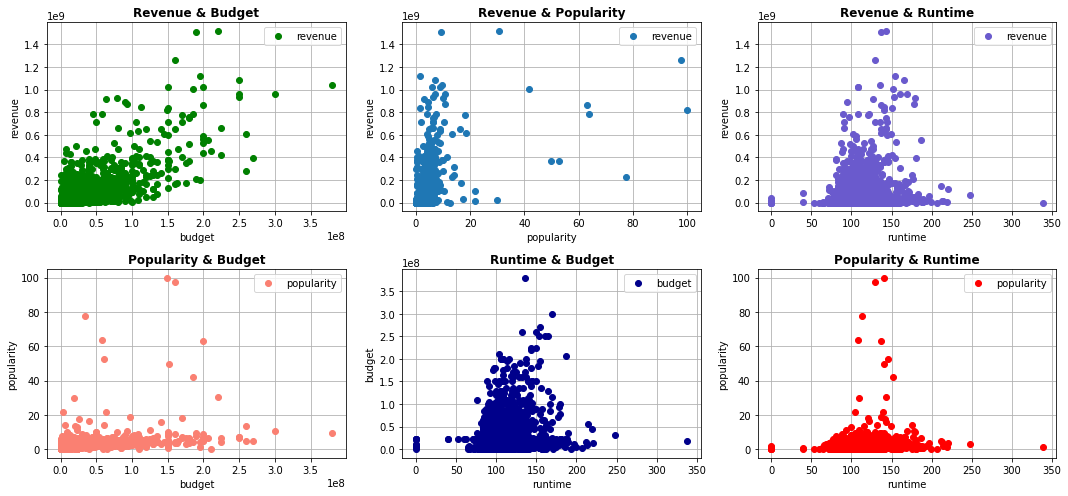

In [373]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7), tight_layout=True)

df.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel= 'revenue', color='green').set_title('Revenue & Budget', fontweight="bold")
ax[0][0].grid()

df.plot(ax=ax[0][1], x='popularity', y='revenue', style='o', ylabel= 'revenue').set_title('Revenue & Popularity', fontweight="bold")
ax[0][1].grid()

df.plot(ax=ax[0][2], x='runtime', y='revenue', style='o', ylabel= 'revenue', color='slateblue').set_title('Revenue & Runtime', fontweight="bold")
ax[0][2].grid()

df.plot(ax=ax[1][0], x='budget', y='popularity', style='o', ylabel= 'popularity', color='salmon').set_title('Popularity & Budget', fontweight="bold")
ax[1][0].grid()

df.plot(ax=ax[1][1], x='runtime', y='budget', style='o', ylabel= 'budget', color='DarkBlue').set_title('Runtime & Budget', fontweight="bold")
ax[1][1].grid()

df.plot(ax=ax[1][2], x='runtime', y='popularity', style='o', ylabel= 'popularity', color='red').set_title('Popularity & Runtime', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

In [374]:
df_temp = df.copy()
df_testcopy = df_test.copy()

Dropping Categorical Columns in the form of dictionaries

In [375]:
df_temp.drop(columns = ['Unnamed: 0', 'id', 'genres', 'belongs_to_collection','overview', 'production_companies', 'production_countries','spoken_languages', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'release_date'], axis = 1, inplace = True)

In [376]:
df_test.drop(columns = ['Unnamed: 0', 'id', 'genres', 'belongs_to_collection','overview', 'production_companies', 'production_countries','spoken_languages', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'release_date'], axis = 1, inplace = True)

In [377]:
df_test.head()

,budget,language,popularity,runtime,status,release_year,release_day_of_the_week
0,22531334.11,en,3.368959,110.0,Released,2000,Tuesday
1,60000000.00,en,2.279772,109.0,Released,1994,Tuesday
2,60000000.00,en,3.661156,101.0,Released,2004,Friday
3,47000000.00,en,1.871012,125.0,Released,1990,Friday
4,37000000.00,en,4.444294,125.0,Released,2010,Wednesday


In [378]:
df_temp.isnull().sum()

budget                     0
language                   0
popularity                 0
runtime                    0
status                     0
revenue                    0
release_year               0
release_day_of_the_week    0
dtype: int64

In [379]:
df_test.isnull().sum()

budget                     0
language                   0
popularity                 0
runtime                    0
status                     0
release_year               0
release_day_of_the_week    0
dtype: int64

In [380]:
df_temp.shape

(2400, 8)

In [381]:
df_temp.head()

,budget,language,popularity,runtime,status,revenue,release_year,release_day_of_the_week
0,14000000.00,en,2.233967,93.0,Released,12314651,2015,Friday
1,40000000.00,en,2.802533,113.0,Released,95149435,2004,Friday
2,3300000.00,en,21.845701,105.0,Released,13092000,2014,Friday
3,1200000.00,hi,1.078673,122.0,Released,16000000,2012,Friday
4,22531334.11,ko,0.390053,118.0,Released,3923970,2009,Thursday


In [382]:
max(df["revenue"])

1519557910

In [383]:
df_temp["revenue"] = df_temp["revenue"]/1000000000

In [384]:
df_temp["language"].describe()

count     2400
unique      35
top         en
freq      2050
Name: language, dtype: object

### Label Encoding

In [385]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_temp["language"] = le.fit_transform(df_temp["language"])
df_test["language"] = le.fit_transform(df_test["language"])

In [386]:
# mean_encode = df.groupby('language')['revenue'].mean()
# print(mean_encode)
# df_temp['language'] = df_temp['language'].map(mean_encode)

In [387]:
df_temp.head()

,budget,language,popularity,runtime,status,revenue,release_year,release_day_of_the_week
0,14000000.00,7,2.233967,93.0,Released,0.012315,2015,Friday
1,40000000.00,7,2.802533,113.0,Released,0.095149,2004,Friday
2,3300000.00,7,21.845701,105.0,Released,0.013092,2014,Friday
3,1200000.00,13,1.078673,122.0,Released,0.016000,2012,Friday
4,22531334.11,17,0.390053,118.0,Released,0.003924,2009,Thursday


In [388]:
df_test.head()

,budget,language,popularity,runtime,status,release_year,release_day_of_the_week
0,22531334.11,2,3.368959,110.0,Released,2000,Tuesday
1,60000000.00,2,2.279772,109.0,Released,1994,Tuesday
2,60000000.00,2,3.661156,101.0,Released,2004,Friday
3,47000000.00,2,1.871012,125.0,Released,1990,Friday
4,37000000.00,2,4.444294,125.0,Released,2010,Wednesday


In [389]:
df_temp["status"].describe()

count         2400
unique           2
top       Released
freq          2396
Name: status, dtype: object

In [390]:
for i in range(len(df_temp["status"])):
    if df_temp["status"][i] == "Released":
        df_temp["status"][i] = 1
    else:
        df_temp["status"][i] = 0
        
for i in range(len(df_test["status"])):
    if df_test["status"][i] == "Released":
        df_test["status"][i] = 1
    else:
        df_test["status"][i] = 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [391]:
df_temp.head()

,budget,language,popularity,runtime,status,revenue,release_year,release_day_of_the_week
0,14000000.00,7,2.233967,93.0,1,0.012315,2015,Friday
1,40000000.00,7,2.802533,113.0,1,0.095149,2004,Friday
2,3300000.00,7,21.845701,105.0,1,0.013092,2014,Friday
3,1200000.00,13,1.078673,122.0,1,0.016000,2012,Friday
4,22531334.11,17,0.390053,118.0,1,0.003924,2009,Thursday


In [392]:
df_test.head()

,budget,language,popularity,runtime,status,release_year,release_day_of_the_week
0,22531334.11,2,3.368959,110.0,1,2000,Tuesday
1,60000000.00,2,2.279772,109.0,1,1994,Tuesday
2,60000000.00,2,3.661156,101.0,1,2004,Friday
3,47000000.00,2,1.871012,125.0,1,1990,Friday
4,37000000.00,2,4.444294,125.0,1,2010,Wednesday


In [393]:
df_temp["release_day_of_the_week"].describe()

count       2400
unique         7
top       Friday
freq        1055
Name: release_day_of_the_week, dtype: object

In [394]:
for i in range(len(df_temp["release_day_of_the_week"])):
    if df_temp["release_day_of_the_week"][i] == "Sunday":
        df_temp["release_day_of_the_week"][i] = 1
    elif df_temp["release_day_of_the_week"][i] == "Monday":
        df_temp["release_day_of_the_week"] = 2
    elif df_temp["release_day_of_the_week"][i] == "Tuesday":
        df_temp["release_day_of_the_week"] = 3
    elif df_temp["release_day_of_the_week"][i] == "Wednesday":
        df_temp["release_day_of_the_week"] = 4
    elif df_temp["release_day_of_the_week"][i] == "Thursday":
        df_temp["release_day_of_the_week"] = 5
    elif df_temp["release_day_of_the_week"][i] == "Friday":
        df_temp["release_day_of_the_week"] = 6
    elif df_temp["release_day_of_the_week"][i] == "Saturday":
        df_temp["release_day_of_the_week"] = 7


for i in range(len(df_test["release_day_of_the_week"])):
    if df_test["release_day_of_the_week"][i] == "Sunday":
        df_test["release_day_of_the_week"][i] = 1
    elif df_test["release_day_of_the_week"][i] == "Monday":
        df_test["release_day_of_the_week"] = 2
    elif df_test["release_day_of_the_week"][i] == "Tuesday":
        df_test["release_day_of_the_week"] = 3
    elif df_test["release_day_of_the_week"][i] == "Wednesday":
        df_test["release_day_of_the_week"] = 4
    elif df_test["release_day_of_the_week"][i] == "Thursday":
        df_test["release_day_of_the_week"] = 5
    elif df_test["release_day_of_the_week"][i] == "Friday":
        df_test["release_day_of_the_week"] = 6
    elif df_test["release_day_of_the_week"][i] == "Saturday":
        df_test["release_day_of_the_week"] = 7

## Feature Scaling

In [395]:
df_temp["budget"] = df_temp["budget"]/max(df_temp["budget"])
df_test["budget"] = df_test["budget"]/max(df_test["budget"])

In [396]:
df_temp["language"] = df_temp["language"]/max(df_temp["language"])
df_test["language"] = df_test["language"]/max(df_test["language"])

In [397]:
df_temp.head()

,budget,language,popularity,runtime,status,revenue,release_year,release_day_of_the_week
0,0.036842,0.205882,2.233967,93.0,1,0.012315,2015,6
1,0.105263,0.205882,2.802533,113.0,1,0.095149,2004,6
2,0.008684,0.205882,21.845701,105.0,1,0.013092,2014,6
3,0.003158,0.382353,1.078673,122.0,1,0.016000,2012,6
4,0.059293,0.500000,0.390053,118.0,1,0.003924,2009,6


In [398]:
df_test.head()

,budget,language,popularity,runtime,status,release_year,release_day_of_the_week
0,0.080469,0.1,3.368959,110.0,1,2000,3
1,0.214286,0.1,2.279772,109.0,1,1994,3
2,0.214286,0.1,3.661156,101.0,1,2004,3
3,0.167857,0.1,1.871012,125.0,1,1990,3
4,0.132143,0.1,4.444294,125.0,1,2010,3


<AxesSubplot:>

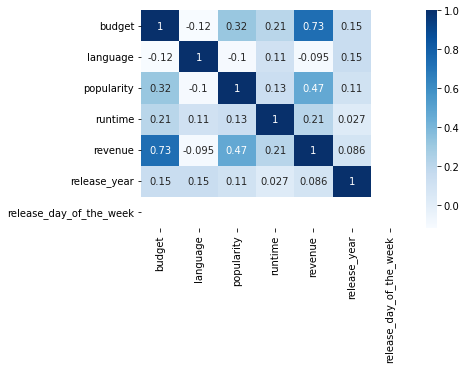

In [399]:
sns.heatmap(df_temp.corr(), cmap='Blues', annot=True)

Budget and Popularity are highly correlated with Revenue of the Movie

## Handling Skewed Data with Square Root Transform

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


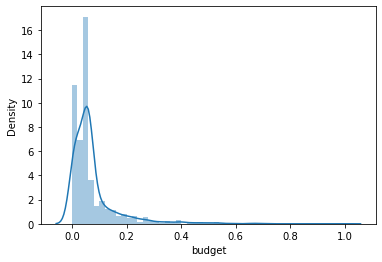

In [400]:
sns.distplot(df_temp['budget']);
plt.show();

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


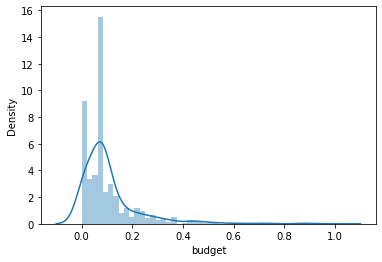

In [401]:
sns.distplot(df_test['budget']);
plt.show();

In [402]:
df_temp['budget'].skew()

3.4042953031961596

In [403]:
df_test['budget'].skew()

3.1155367961211033

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


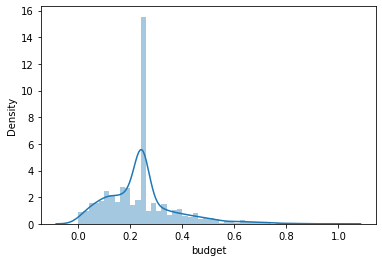

1.218473153079477

In [404]:
sns.distplot(np.sqrt(df_temp['budget']));
plt.show();
np.sqrt(df_temp['budget']).skew()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


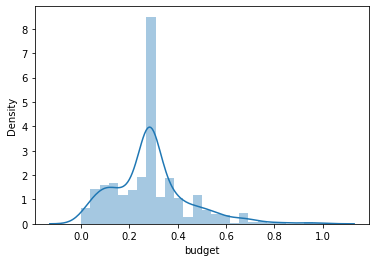

0.9746960870750794

In [405]:
sns.distplot(np.sqrt(df_test['budget']));
plt.show();
np.sqrt(df_test['budget']).skew()

In [406]:
df_temp['budget'] = np.sqrt(df_temp['budget'])
df_test['budget'] = np.sqrt(df_test['budget'])

In [407]:
df_temp['language'].skew()

3.763610382148879

In [408]:
df_test['language'].skew()

3.949998268278243

In [409]:
df_temp['popularity'].skew()

13.684011405488251

In [410]:
df_test['popularity'].skew()

1.7131145289038734

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


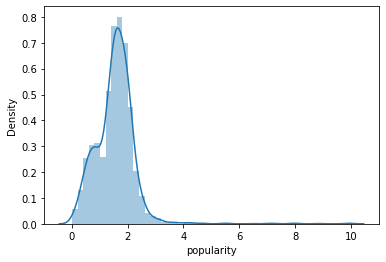

2.920286370836839

In [411]:
sns.distplot(np.sqrt(df_temp['popularity']));
plt.show();
np.sqrt(df_temp['popularity']).skew()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


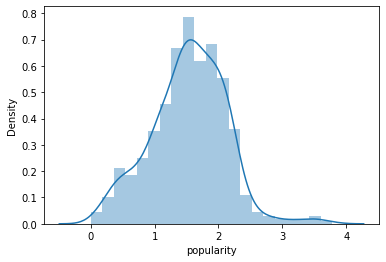

0.03927671058225473

In [412]:
sns.distplot(np.sqrt(df_test['popularity']));
plt.show();
np.sqrt(df_test['popularity']).skew()

In [413]:
df_temp['popularity'] = np.sqrt(df_temp['popularity'])
df_test['popularity'] = np.sqrt(df_test['popularity'])

In [414]:
df_temp['release_year'].skew()

-0.8608396954019218

In [415]:
df_test['release_year'].skew()

-0.6794954202479067

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


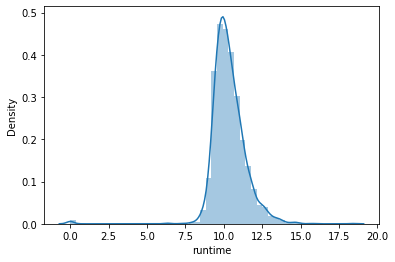

-1.70256408173217

In [416]:
sns.distplot(np.sqrt(df_temp['runtime']));
plt.show();
np.sqrt(df_temp['runtime']).skew()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


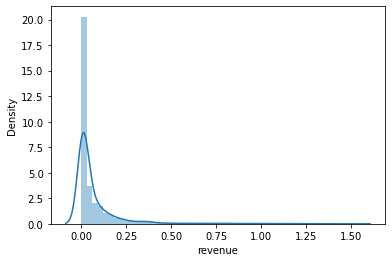

In [417]:
sns.distplot(df_temp["revenue"]);

In [418]:
# Skewness and Kurtosis
df["revenue"].skew()

4.484377675503804

## Model Building and Testing

In [419]:
y = df_temp["revenue"]
df_temp.drop(columns=["revenue"], axis = 1, inplace = True)
X = df_temp

In [420]:
y

0       1.231465e-02
1       9.514944e-02
2       1.309200e-02
3       1.600000e-02
4       3.923970e-03
            ...     
2395    2.483920e-04
2396    2.045940e-01
2397    3.094927e-01
2398    2.027581e-02
2399    1.500000e-08
Name: revenue, Length: 2400, dtype: float64

In [421]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [422]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
y_prediction =  reg.predict(X_test)

# Accuracy
def rmsle(y,y0): 
    return np.sqrt(np.mean(np.square(np.log1p(y)-np.log1p(y0))))

# root mean square log error
rmsle = rmsle(y_prediction, y_test)
print(rmsle)

# Mean Square Error
print(sum(y_prediction - y_test) / (0.2 * len(y_test)))

from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, y_prediction)

0.06911608720849403
0.008751302809965245


0.004777033511012154

## Model Training and Prediction

In [423]:
df_test.head()

,budget,language,popularity,runtime,status,release_year,release_day_of_the_week
0,0.283671,0.1,1.835472,110.0,1,2000,3
1,0.462910,0.1,1.509891,109.0,1,1994,3
2,0.462910,0.1,1.913415,101.0,1,2004,3
3,0.409704,0.1,1.367849,125.0,1,1990,3
4,0.363515,0.1,2.108149,125.0,1,2010,3


In [424]:
model = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X, y)
y_pred = model.predict(df_test)

In [425]:
y_pred = (y_pred*1000000000)

In [426]:
y_pred

array([1.22463855e+08, 1.46908996e+08, 1.70808807e+08, 3.11540765e+08,
       1.32508346e+08, 1.15147309e+07, 3.78360628e+07, 6.06901643e+07,
       4.46207871e+07, 8.49417660e+07, 4.01952398e+07, 2.36631032e+08,
       1.66734864e+08, 5.66572415e+06, 9.28561688e+07, 8.44350447e+07,
       2.69000107e+07, 7.91463924e+07, 1.29938767e+08, 1.51296510e+08,
       2.44606183e+07, 7.12427692e+07, 2.28267982e+07, 1.56268208e+06,
       9.74382531e+07, 7.42843779e+07, 7.91103165e+07, 9.00130679e+07,
       9.53116325e+07, 6.77748666e+07, 7.38463944e+06, 1.13403154e+08,
       3.91277979e+07, 8.38089859e+07, 2.59382404e+07, 2.37293446e+07,
       1.15498319e+07, 4.19349113e+08, 5.49255225e+07, 5.85053405e+07,
       9.97935681e+07, 2.11321190e+07, 1.04552214e+08, 4.60680625e+08,
       3.53480332e+07, 6.25236546e+07, 8.49704877e+06, 2.97996166e+07,
       2.03362738e+08, 1.38265479e+08, 1.86122294e+07, 5.03377147e+07,
       7.67979628e+07, 7.73777155e+07, 2.69898884e+08, 1.87390904e+08,
      

In [428]:
submission = df_testcopy
submission['predicted_revenue'] = y_pred
submission['predicted_revenue'] = submission['predicted_revenue'].apply(np.int64)
submission.to_csv('submission.csv', index = False)

In [429]:
submission

,Unnamed: 0,id,belongs_to_collection,budget,genres,language,overview,popularity,production_companies,production_countries,...,status,tagline,title,Keywords,cast,crew,release_year,release_day_of_the_week,release_date,predicted_revenue
0,2400,2401,NaN,22531334.11,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,A comedy that pays tribute to the science fict...,3.368959,"[{'name': 'Independent Film Channel', 'id': 40...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,Sometimes the future is better than it used to...,Happy Accidents,"[{'id': 10183, 'name': 'independent film'}]","[{'id': 7132, 'name': ""Vincent D'Onofrio"", 'ch...","[{'id': 37948, 'name': 'Brad Anderson', 'depar...",2000,Tuesday,2000-01-25,122463854
1,2401,2402,NaN,60000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,"As part of a fertility research project, a mal...",2.279772,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,Nothing is inconceivable,Junior,"[{'id': 1009, 'name': 'baby'}, {'id': 1279, 'n...","[{'id': 1100, 'name': 'Arnold Schwarzenegger',...","[{'id': 8858, 'name': 'Ivan Reitman', 'departm...",1994,Tuesday,1994-11-22,146908995
2,2402,2403,NaN,60000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",en,"Join uptight David Starsky and laid-back Ken ""...",3.661156,"[{'name': 'Weed Road Pictures', 'id': 433}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,They're the man.,Starsky & Hutch,"[{'id': 167715, 'name': 'informant'}, {'id': 1...","[{'id': 7399, 'name': 'Ben Stiller', 'charater...","[{'id': 546, 'name': 'Jeanne McCarthy', 'depar...",2004,Friday,2004-03-05,170808806
3,2403,2404,NaN,47000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"After his mistress runs over a young teen, a W...",1.871012,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,"Take one Wall Street tycoon, his Fifth Avenue ...",The Bonfire of the Vanities,"[{'id': 577, 'name': 'black people'}, {'id': 7...","[{'id': 31, 'name': 'Tom Hanks', 'charater': '...","[{'id': 1150, 'name': 'Brian De Palma', 'depar...",1990,Friday,1990-12-21,311540765
4,2404,2405,NaN,37000000.00,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",en,"Doug MacRay is a longtime thief, who, smarter ...",4.444294,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,Welcome to the bank robbery capital of America.,The Town,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 880, 'name': 'Ben Affleck', 'charater'...","[{'id': 880, 'name': 'Ben Affleck', 'departmen...",2010,Wednesday,2010-09-15,132508346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2995,2996,NaN,22531334.11,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,Military men Rock Reilly and Eddie Devane are ...,3.347614,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'id': 13022, 'name': 'Tom Berenger', 'charat...","[{'id': 2778, 'name': 'Dennis Hopper', 'depart...",1994,Friday,1994-04-22,73647962
596,2996,2997,NaN,22531334.11,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",sv,Three girls in 1980s Stockholm decide to form ...,1.266574,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",...,Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'id': 1171819, 'name': 'Mira Barkhammar', 'c...","[{'id': 6338, 'name': 'Imor Hermann', 'departm...",2013,Thursday,2013-03-28,129412671
597,2997,2998,NaN,65000000.00,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",en,"Samantha Caine, suburban homemaker, is the ide...",4.920327,"[{'name': 'New Line Cinema', 'id': 12}, {'na